# Churn Analysis

## Steps:

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models
    4. Model Evaluation and concluding with the best of the model.
    
    
    


### Importing the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [ ]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier

from datetime import datetime 


### Understanding the data

In [ ]:
df = pd.read_csv("Churn.csv")

In [ ]:
print("Data Shape: {}".format(df.shape))
df.head()

Data Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [ ]:
df.dropna(inplace = True)


### Data Manipulation

In [ ]:
df1 = df.iloc[:,1:]

In [ ]:
df['TotalCharges'] = df1["TotalCharges"].replace(" ",np.nan)


In [ ]:
df1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df1['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
df1.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
col_mask=df1.isnull().any(axis=0) 


In [ ]:
row_mask=df1.isnull().any(axis=1)


In [ ]:
df1.loc[row_mask,col_mask]


""


In [ ]:
df1['TotalCharges'] = df1["TotalCharges"].replace(" ",np.nan)


In [ ]:
df1 = df1[df["TotalCharges"].notnull()]
df1 = df1.reset_index()[df1.columns]

### Data Visualization

In [ ]:
df1["TotalCharges"] = df1["TotalCharges"].astype(float)

In [ ]:
numeric_attr_names = ['TotalCharges']

# add a small epsilon to eliminate zero values from data for log scaling
numeric_attr = df1[numeric_attr_names] + 1e-7
numeric_attr = numeric_attr.apply(np.log)

# normalize all numeric attributes to the range [0,1]
df_visualise = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())
df_visualise['Churn'] = df1['Churn']

In [ ]:
df_visualise['Churn'] = df1['Churn']

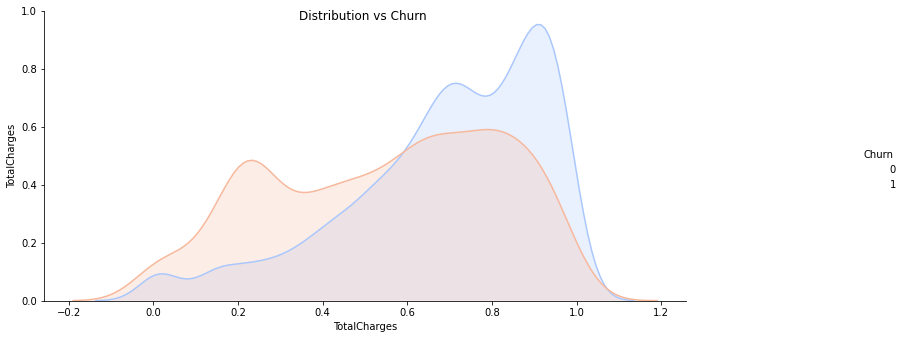

In [ ]:
g = sns.pairplot(data=df_visualise, vars=numeric_attr_names, hue='Churn', palette ='coolwarm')
g.fig.suptitle('Distribution vs Churn')
g.fig.set_size_inches(15, 5)


In the above distribution comparison of Churn vs TotalCharges, we can see as the TotalCharges increase then the churn rate also increases.

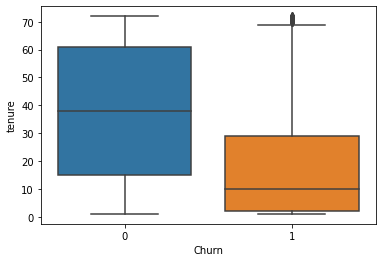

In [ ]:
sns.boxplot(x='Churn',y='tenure',data=df1)

While comparing Churn with tunure, we found out that it has an outlier. Tenure could be an important feature in terms of high churn rate.


In [ ]:
df1['gender'].replace(to_replace='Male', value=1, inplace=True)
df1['gender'].replace(to_replace='Female',  value=0, inplace=True)

In [ ]:
numeric_attr_names = ['gender']

# add a small epsilon to eliminate zero values from data for log scaling
numeric_attr = df1[numeric_attr_names] + 1e-7
numeric_attr = numeric_attr.apply(np.log)

# normalize all numeric attributes to the range [0,1]
df_visualise = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())
df_visualise['Churn'] = df1['Churn']


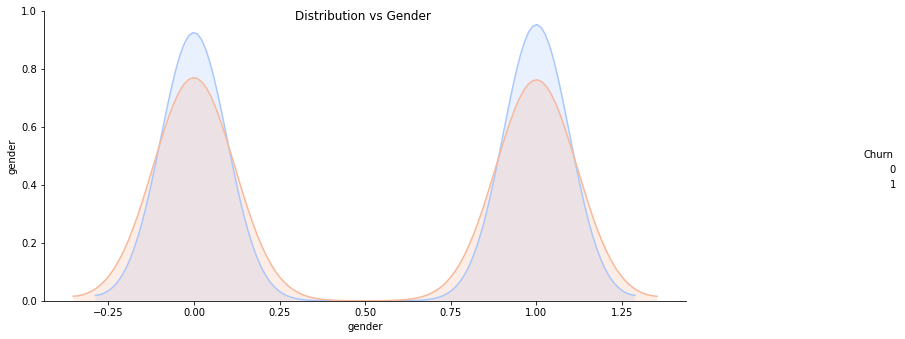

In [ ]:
g = sns.pairplot(data=df_visualise, vars=numeric_attr_names, hue='Churn', palette ='coolwarm')
g.fig.suptitle('Distribution vs Gender')
g.fig.set_size_inches(15, 5)

We can assume with this distribution that the ratio of Gender(Male and Female) vs Churn that no relevance on higher churn as churn is not based upon any specific gender.


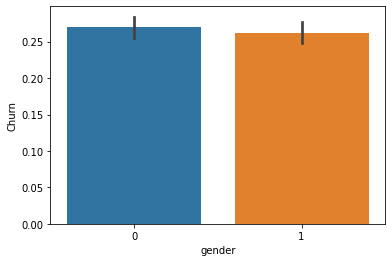

In [ ]:
sns.barplot(x='gender',y='Churn',data=df1)

Same goes for this plot which is saying the same thing about almost equal number of male and female. Gender is not a feature which is causing the higher churn rate.

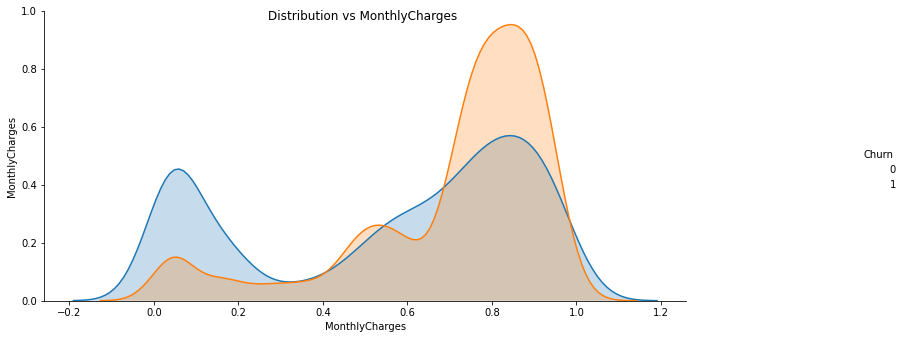

In [ ]:

numeric_attr_names = ['MonthlyCharges']

# add a small epsilon to eliminate zero values from data for log scaling
# explain where you got this idea from and give credit
numeric_attr = df1[numeric_attr_names] + 1e-7
numeric_attr = numeric_attr.apply(np.log)

# normalize all numeric attributes to the range [0,1]
df_visualise = (numeric_attr - numeric_attr.min()) / (numeric_attr.max() - numeric_attr.min())
df_visualise['Churn'] = df1['Churn']

g = sns.pairplot(data=df_visualise, vars=numeric_attr_names, hue='Churn')
g.fig.suptitle('Distribution vs MonthlyCharges')
g.fig.set_size_inches(15, 5)

We can also see from these distribution that the more the monthly charges and the higher the churn rate.

In [ ]:
df1['Contract'].value_counts()


Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
df1["Contract"] = df1["Contract"].astype(str)
df1['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [ ]:
df1["Contract"] = df1["Contract"].astype(str)

Text(0.5, 1.0, 'number of Customers by Contract Type')

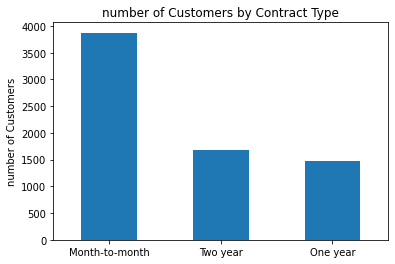

In [ ]:
df_visualise = df1['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_ylabel('number of Customers')
df_visualise.set_title('number of Customers by Contract Type')

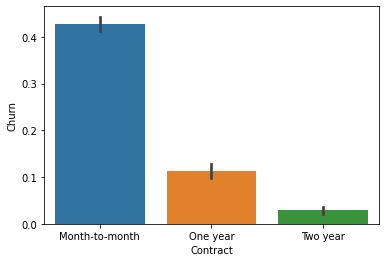

In [ ]:
sns.barplot(x='Contract',y='Churn',data=df1)

From the above graph which is comparing Churn vs Contracts, we can see that the user who opt for long term contract - two year and one year are more loyal to the company as compared to the month to month users. Retention rate is high if the customer is opting for Two year and one year Contract

In [ ]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Text(0.5, 1.0, 'PhoneService')

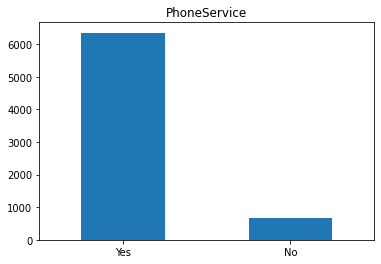

In [ ]:
df_visualise = df1['PhoneService'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('PhoneService')

Text(0.5, 1.0, 'MultileLines')

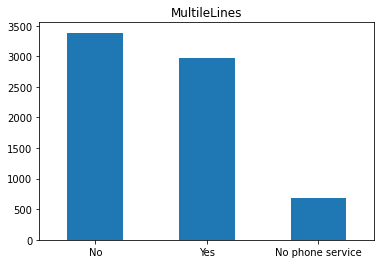

In [ ]:
df_visualise = df1['MultipleLines'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('MultileLines')

In [ ]:
df1['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Text(0.5, 1.0, 'Types of Interent Service')

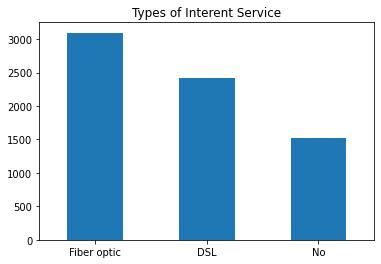

In [ ]:
df_visualise = df1['InternetService'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('Types of Interent Service')

Text(0.5, 1.0, 'OnlineSecurity')

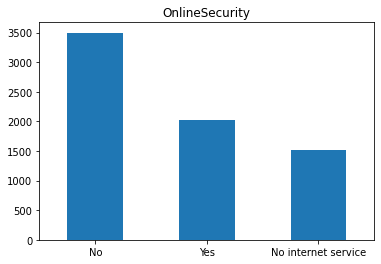

In [ ]:
df_visualise = df1['OnlineSecurity'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('OnlineSecurity')

In [ ]:
df1['TechSupport'].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

Text(0.5, 1.0, 'TechSupport')

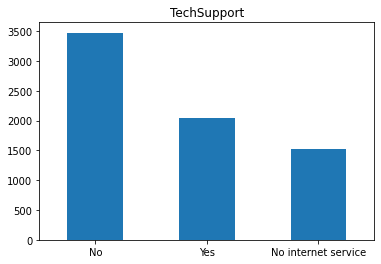

In [ ]:
df_visualise = df1['TechSupport'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('TechSupport')

Text(0.5, 1.0, 'DeviceProtection')

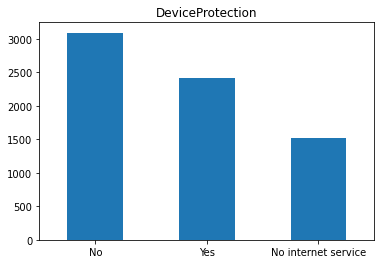

In [ ]:
df_visualise = df1['DeviceProtection'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('DeviceProtection')

Text(0.5, 1.0, 'StreamingTV')

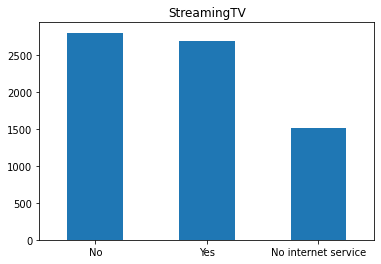

In [ ]:
df_visualise = df1['StreamingTV'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('StreamingTV')

Text(0.5, 1.0, 'StreamingMovies')

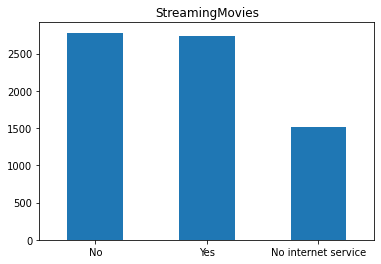

In [ ]:
df_visualise = df1['StreamingMovies'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('StreamingMovies')

Text(0.5, 1.0, 'PaymentMethod')

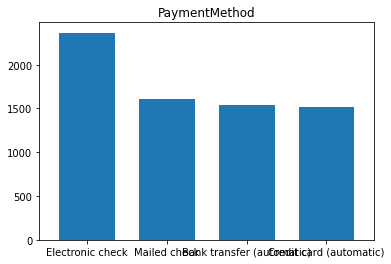

In [ ]:
df_visualise = df1['PaymentMethod'].value_counts().plot(kind = 'bar',rot = 0, width = 0.7)
df_visualise.set_title('PaymentMethod')

Text(0.5, 1.0, 'PaperlessBilling')

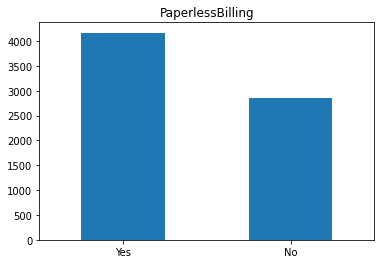

In [ ]:
df_visualise = df1['PaperlessBilling'].value_counts().plot(kind = 'bar',rot = 0, width = 0.5)
df_visualise.set_title('PaperlessBilling')

In [ ]:
# One hot Encoding
df1 = pd.get_dummies(df1, prefix_sep='_', drop_first=True)
df1.head()

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,34,56.95,1889.50,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,0,45,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,0,2,70.70,151.65,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
df1.columns


Index(['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Implement Machine Learning Models

In [ ]:
y = df1['Churn'].values
X = df1.drop(columns = ['Churn'])

In [ ]:
X.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range = (0,1))


# train normalise
X[['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check' ]] = min_max_scaler.fit_transform(X[['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']])

In [ ]:
features = X.columns.values
min_max_scaler.fit(X)
X.columns = features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:

print('x_train:',X_train.shape)
print('y_train:',X_test.shape)

x_train: (4922, 30)
y_train: (2110, 30)


#### RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=30, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=50, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
## Make predictions
pred = model_rf.predict(X_test)
print ("Accuracy:", metrics.accuracy_score(y_test, pred))
print ("macro", precision_recall_fscore_support(y_test, pred, average='macro'))
print ("micro", precision_recall_fscore_support(y_test, pred, average='micro'))
print ("weighted", precision_recall_fscore_support(y_test, pred, average='weighted'))

Accuracy: 0.806680881307747
macro (0.7503045170021994, 0.6980868098323783, 0.7160157432636998, None)
micro (0.806680881307747, 0.806680881307747, 0.806680881307747, None)
weighted (0.7943071216169437, 0.806680881307747, 0.7955045498255877, None)


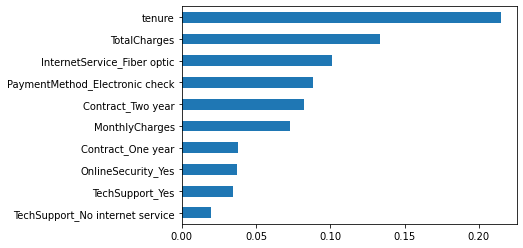

In [ ]:
imp = model_rf.feature_importances_
weights = pd.Series(imp,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

#### LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
from sklearn import metrics
pred = model.predict(X_test)

In [ ]:
print ("Accuracy:", metrics.accuracy_score(y_test, pred))
print ("macro", precision_recall_fscore_support(y_test, pred, average='macro'))
print ("micro", precision_recall_fscore_support(y_test, pred, average='micro'))
print ("weighted", precision_recall_fscore_support(y_test, pred, average='weighted'))



Accuracy: 0.814498933901919
macro (0.7573846911718198, 0.7266440850425748, 0.7392062994944297, None)
micro (0.814498933901919, 0.814498933901919, 0.8144989339019189, None)
weighted (0.8062296325005058, 0.814498933901919, 0.8086229214283187, None)


AxesSubplot(0.125,0.125;0.775x0.755)


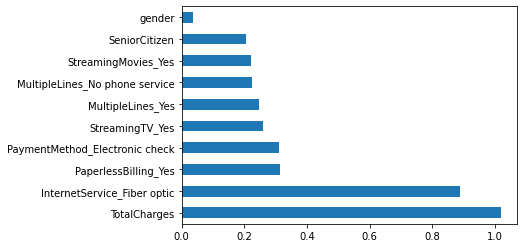

In [ ]:
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='barh'))

### Conclusion

If considering the model performace, LogesticRegression did better than Random Forest but the difference is not that much and if observations from both the models are taken in consideration then the chances of having a higher retention rate and a lower churn rate will increase. So, let’s have a look at the observations of both the model.

####  Random Forest Classfier (Observation)

We can see from the above chart that the most weighted/important feature which affects the churn rate is Tenure. Also as per the distribution comparison of TotalCharges vs Churn that we did in Data Visualization section also reflected that the more the charges and higher the churn rate as the model also refelcted the same. It is also seen that the InterentService feature who are provided with fibre optic has a bit high churn rate. Furthermore, providing TechSupport and OnlineSecurity can increase the retention rate. 

#### LogesticRegression (Observation)

We can see from the feature importance performed on LogisticRegression model, TotalCharges being high is creating a higher churn rate and whereas providing the service of StreamingMovies, MultipleLines, StreamingTV will help in having a low churn and a higher retention rate. Also the customer who are provided with PaperlessBilling as well as the PaymentMethod is electronic check has a higher retention and a lower churn rate which clearly indicates that if provided electornic and paperless billing system, churn rate will drop and retention rate will increase. Also taking in consideration the result of RandomForest, it shows that both the model are stating that if FibreOptic is provided as the InterentService then the churn rate is relatively higher than the other InterentService. 

- Totalcharges
- InternetService_Fiber optic
- Tenure

So we should take the following features in consideration and see why these services are leading to a higher churn rate and lower retention rate.